### Data Description

The details and description of the Boston Housing Data can be found here:

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

and

https://towardsdatascience.com/things-you-didnt-know-about-the-boston-housing-dataset-2e87a6f960e8

In [159]:
# import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# OPTIONAL:
# import pearson correlation library
from scipy.stats import pearsonr

# to show grid lines in plots
sns.set_style('whitegrid')

# to make all plots well positioned in the notebook
%matplotlib inline

In [160]:
# Import the Boston DataSet

from sklearn.datasets import load_boston

In [161]:
# store the dataset

boston = load_boston()

In [162]:
# check the different keys

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [163]:
# You can choose to print each of these keys to see their content

# kindly delete the '#' and run the code to see


## for data
# print(boston['data'])

## for target or predictors
# print(boston['target'])

## for feature_names OR predictor/column names
# print(boston['feature_names'])

## for DESCR: description of each feature/predictor
print(boston['DESCR'])

## for filename 
# (not relevant)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Exploratory Data Analysis
#### Let's explore the data a little !

##### First, let us put the data in a Dataframe

In [164]:
# chect the current data type

type(boston['data'])

numpy.ndarray

In [165]:
# Convert the numpy array " boston['data'] " into a dataframe

bostonData_array = boston['data']

boston_df = pd.DataFrame(bostonData_array, columns = ['CRIM','ZN','INDUS','CHAS', 'NOX', 'RM',
                                                      'AGE', 'DIS', 'RAD', 'TAX', ' PTRATIO', 'B', 'LSTAT'])

# add the RESPONSE Variable
boston_df['Med. Worth of Home'] = boston['target']

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Med. Worth of Home
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


###### (1) Compare 
the 'Average number of rooms per dwelling [RM]' (predictor) with the 'Median value of owner-occupied homes in $1000's [boston['target']] (the response vairable). 

######  Does the correlation make sense?

C:\Users\okisa\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


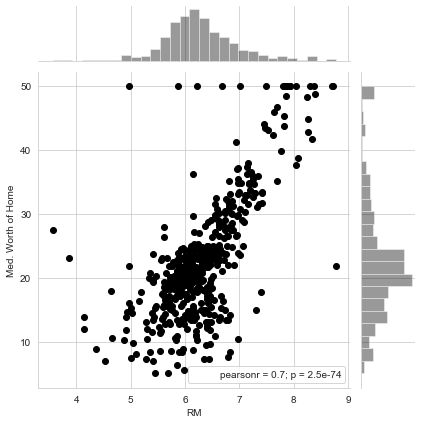

In [166]:
sns.jointplot(x = 'RM',
              y = 'Med. Worth of Home',
              data = boston_df ,
              color = 'k',
              stat_func = pearsonr)   # optional for the correlation value and p-value

###### YES, correlation makes sense.
There exist is a positive correlation/relationship between  RM (Average number of rooms per dwelling) and boston['target'] (Median value of owner-occupied homes in $1000's). This could possibly infer that, higher average number of rooms per dwelling would result to a higher median value of the homes.

##### (2) Let us do a pair plot to see the relationship between "selected" predictors/columns and their correlation

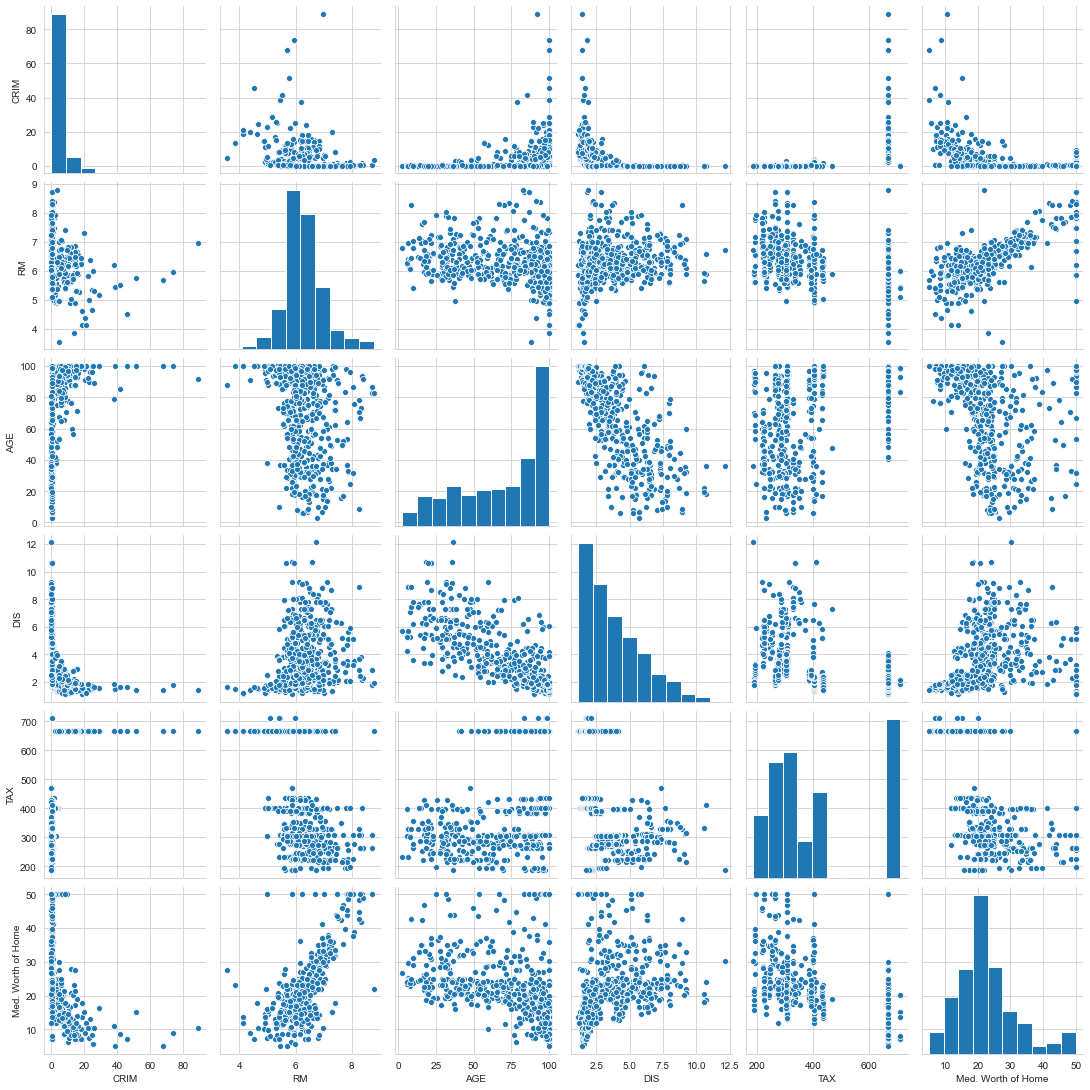

In [167]:
sns.pairplot(data = boston_df[
                                ['CRIM', 'RM', 'AGE', 'DIS', 'TAX', 'Med. Worth of Home']
                             ]
            )

### We can as well create a linear model plot

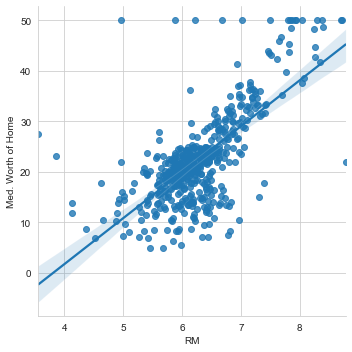

In [168]:
sns.lmplot(x = 'RM', y = 'Med. Worth of Home', data = boston_df) 


In [169]:
## It will be nice to represent this 'RM' and 'Med. Worth of Home' with a hex plot

C:\Users\okisa\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


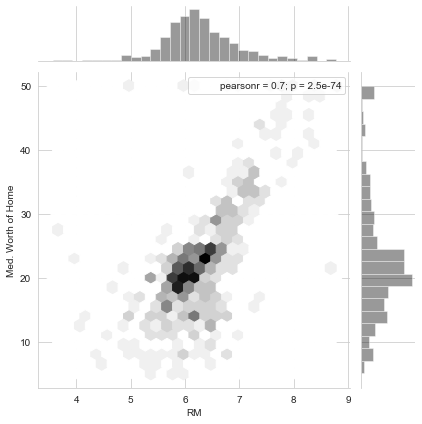

In [170]:
sns.jointplot(x = 'RM',
              y = 'Med. Worth of Home',
              data = boston_df ,
              kind = 'hex',          # also try 'scatter', 'reg', 'resid', 'kde' *it is optional
              color = 'k',
              stat_func = pearsonr)

#### Interpretation:
    ** There is a dense between 5.5 to 7.0 in 'RM' which corresponds to between 15.0 to 25.0 in the Median Worth of Home,
    ** This implies that most owner-occupied homes in Boston have an average of 6 rooms per dwelling and the median worth of these homes is around between 150,000 to 250,000
    ** We see that there is a strong correlation between the average number of rooms per dwelling and the Median Value or Worth of the Homes. Correlation is strong being 0.7.

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

** Our variable X will equal the numerical features/columns which is boston['data'] ** 

** Our variable y will equal the response variable which is boston['target'], i.e. Median value of owner-occupied homes in \$1000's **

In [171]:
# predictors

X = boston['data']

In [172]:
# response (predicands)

y = boston['target']

In [173]:
# Split data into training and testing set

from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, # 30% of data should be used to test so # 70% to train
                                                    random_state = 101)

#### Train the Model with train-data

In [175]:
# import LinearRegression

from sklearn.linear_model import LinearRegression

In [176]:
# create an object for the linear regression

lm = LinearRegression()

In [177]:
# train and fit 'lm' on the training data

lm.fit(X = X_train,
       y = y_train)

LinearRegression()

In [178]:
# Get the coefficients of the predictors

lm.coef_

print('Coefficients: ', lm.coef_)

Coefficients:  [-8.85049752e-02  5.02928536e-02  2.03483110e-02  3.75427054e+00
 -1.77483714e+01  3.24776492e+00  1.20008182e-02 -1.40916141e+00
  2.63880691e-01 -1.03440009e-02 -9.51780874e-01  6.11600491e-03
 -5.97133217e-01]


In [179]:
# Get the intercept of the predictors


lm.intercept_

# print('Intercept = %0.3f' % lm.intercept_)   # to 3 decimal place

40.218929012550646

In [180]:
## The model is thus given by:


print("Our linear model is: "
      " 'Medain Value of Home (Y)' = {:.4} + {:.4}*CRIM + {:.4}*ZN + {:.4}*INDUS + {:.4}*CHAS + {:.4}*NOX + {:.4}*RM + "
                                           " {:.4}*AGE + {:.4}*DIS + {:.4}*RAD + {:.4}*TAX + {:.4}*PTRATIO + {:.4}*B + "
                                           " {:.4}*LSTAT ".format(
                                   lm.intercept_, 
                                lm.coef_[0], lm.coef_[1], lm.coef_[2], lm.coef_[3], lm.coef_[4], lm.coef_[5], 
                           lm.coef_[6], lm.coef_[7], lm.coef_[8], lm.coef_[9], lm.coef_[10], lm.coef_[11], lm.coef_[12]))


Our linear model is:  'Medain Value of Home (Y)' = 40.22 + -0.0885*CRIM + 0.05029*ZN + 0.02035*INDUS + 3.754*CHAS + -17.75*NOX + 3.248*RM +  0.012*AGE + -1.409*DIS + 0.2639*RAD + -0.01034*TAX + -0.9518*PTRATIO + 0.006116*B +  -0.5971*LSTAT 


### Prediction of Model
** We evaluate its performance of our model by predicting the test values! **

In [181]:
predictions = lm.predict(X = X_test)

In [182]:
predictions

array([40.11113508, 27.38971873, 16.64700435, 16.98475572, 31.12920137,
       32.17489772, 38.5534506 ,  8.16734819, 33.48547457,  7.21877263,
       30.45404514, 13.44085219, 16.25354375, 17.34359227, 25.1543491 ,
       20.44171457,  7.30340549, 33.13892161, 28.41293108, 24.58522513,
       12.44673568, 20.25489284, 22.48601345, 24.42119495, 33.92740928,
       18.63104614, 32.32820984, 18.67352155, 27.36115374, 34.46174375,
       19.84089751, 18.40373436, 37.15821555, 44.94610923, 30.27513579,
       22.00760066, 16.0127978 , 18.16328402,  4.33298095, 30.93867591,
       24.15262229, 17.17277775, 34.10334259, 13.89433899, 17.46893797,
       25.30893285, 30.35309561, 16.10339452, 26.91513852, 22.98227547,
       32.14815603, 37.34454946, 22.90074019, 17.56894548, 30.18430234,
        0.10360753, 20.22573888, 16.82248142, 23.15487984, 21.16760077,
       30.5734497 ,  3.15502223, 15.92340596, 20.06361892, 10.43608925,
       24.28745773, 24.00445196, 19.86245393, 17.63614975, 19.44

### Compare:
**Now let's see how strong the relationship is, between our predictions and the real (original y-values)**

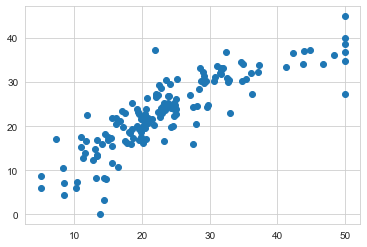

In [183]:
# Using a scatter plot to check for correlation



# Using matplotlib

plt.scatter(x = y_test,
            y = predictions)

C:\Users\okisa\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


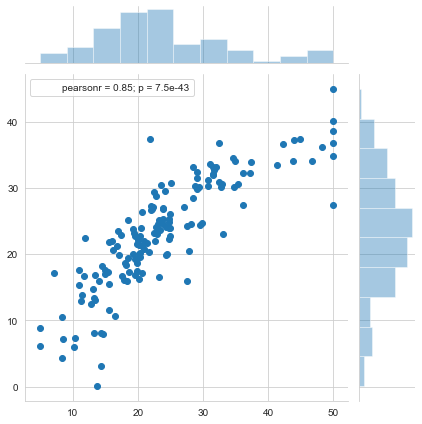

In [184]:
# Using seaborn scatterplot

#sns.scatterplot(x = y_test,        # original or real values from data
#                y = predictions)   # predicted values




# Using Seaborn Jointplot (so we can call the correlation value)

sns.jointplot(x = y_test,
              y = predictions,
              kind = 'scatter',
              stat_func = pearsonr)

### Interpreation:
    ** There is obviously a strong correlation between our prediction and the original values. Correlation value is 0.85,   hence our model is good enough to be used for predictions in real life.

## Evaluating the Model
** Let's evaluate our model performance by calculating the residual sum of squares and the variance score (R^2) **

In [185]:
# import the library

from sklearn import metrics

##### Quick important note:
   ** The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. **Lower values of RMSE indicate better fit**. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction. (Source: https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/)**

In [186]:
# for MAE:

mae = metrics.mean_absolute_error(y_true = y_test,
                                  y_pred = predictions)


# for MSE:

mse = metrics.mean_squared_error(y_true = y_test,
                                 y_pred = predictions)


# for RMSE

rmse = np.sqrt( metrics.mean_squared_error(y_true = y_test,
                                           y_pred = predictions) 
               )

print("MAE: ", mae )
print("MSE: ", mse )
print("RMSE:", rmse)

MAE:  3.8356963614189143
MSE:  28.547585271468087
RMSE: 5.342994036256084


In [187]:
# Since the RMSE is low, we can say that our model accurately predicts the reponse.

## Residuals:
    ** Let's quickly explore the residuals to make sure everything was okay with our data. We do this by ploting the               histogram of the residuals to ensure it is normmally distributed **

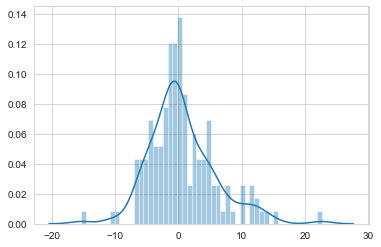

In [188]:
# Using Seaborn

sns.distplot(a = (y_test - predictions),   # this is how residual is calculated
             bins = 50)

In [189]:
# YES: there is a good level of normality in our residuals. Hence, we finally accepts the model

## Conclusion:
#### Significance of predictors
    ** We can tell which predictor is more powerful (i.e. more significant) in predicting the response variable
    ** We do this in two methods:
        *** Using the coefficients of the predictors
        *** Using the p-values of the predictors

##### Method 1 (Coefficient of predictors)

In [190]:
# Create a dataframe that will take the coefficeint and also the column names




# recall the column names
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       ' PTRATIO', 'B', 'LSTAT', 'Med. Worth of Home'],
      dtype='object')

In [191]:
# remove the last column (i.e. the predictor)

boston_df.drop(labels = 'Med. Worth of Home',   # name of the column to drop
               axis = 1,      # means column, axis = 0 means row 
               inplace = True)    # make the drop permanent

# now check the columns again
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       ' PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [192]:
# DataFrame

cdf = pd.DataFrame(data = lm.coef_,
                   index = boston_df.columns,
                   columns = ['Coefficient'])

cdf

,Coefficient
CRIM,-0.088505
ZN,0.050293
INDUS,0.020348
CHAS,3.754271
NOX,-17.748371
RM,3.247765
AGE,0.012001
DIS,-1.409161
RAD,0.263881
TAX,-0.010344


In [193]:
# Let's sort the values of by the Coefficient column


cdf.sort_values(by = ['Coefficient'],
                ascending = False)

,Coefficient
CHAS,3.754271
RM,3.247765
RAD,0.263881
ZN,0.050293
INDUS,0.020348
AGE,0.012001
B,0.006116
TAX,-0.010344
CRIM,-0.088505
LSTAT,-0.597133


### Interpretation 1:
    ** We see the significance of each predictor (based on their coefficients) in the above table in descendeing order
    ** Clearly, 'CHAS'':Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)' and 'RM: ''average number of rooms per dwelling', happens to be the most significnat
    ** while 'NOX: '' nitric oxides concentration (parts per 10 million)' is the least significant

##### Method 2 (Using p-values)

In [194]:
# This method is like a short cut of everything we have been doing
# It output all the above we result we have done so far,
# the confidence interval, p-values at 95% confidence level,
# AIC, BIC, and more


import statsmodels.api as sm

X = X   # columns or predictors 
y = y  # predictor == Price 

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)   # OLS means Ordinary Least Squares
est2 = est.fit()
print(est2.summary() )

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 05 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        11:24:50   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

### Interpretation 2:
    ** We see the significance of each predictor (based on their coefficients) in the above table. We see that the p-values (P>|t|) are all less than 0.05 for all predictors except for two, 2 variables
    ** The variables 'x1' to 'x13' represents the same order with which the columns are described in boston['DESCR']
    ** Clearly, all variables are siginificant at a 95% confidence level except 'x3' and 'x7'. They both respectively         corresponds to:
        *** ' INDUS:    proportion of non-retail business acres per town ' and 
        *** 'AGE:    proportion of owner-occupied units built prior to 1940'